In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

Load the data from .csv

In [2]:
data = pd.read_csv(r"E:\AISD\Term2\Advance ML\LAB\Lab1\Brestcancer_PCA\breastcancer.csv")

In [3]:
data

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,benign
695,2,1,1,1,2,1,1,1,1,benign
696,5,10,10,3,7,3,8,10,2,malignant
697,4,8,6,4,3,4,10,6,1,malignant


In [4]:
data.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign


In [5]:
data.isnull().sum()

Clump_Thickness          0
Cell_Size_Uniformity     0
Cell_Shape_Uniformity    0
Marginal_Adhesion        0
Single_Epi_Cell_Size     0
Bare_Nuclei              0
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64

In [6]:
data = data.replace('?', np.nan)

In [7]:
data.isnull().sum()

Clump_Thickness           0
Cell_Size_Uniformity      0
Cell_Shape_Uniformity     0
Marginal_Adhesion         0
Single_Epi_Cell_Size      0
Bare_Nuclei              16
Bland_Chromatin           0
Normal_Nucleoli           0
Mitoses                   0
Class                     0
dtype: int64

In [8]:
data['Bare_Nuclei'] = data['Bare_Nuclei'].fillna(data['Bare_Nuclei'].mode()[0])

In [9]:
data.isnull().sum()

Clump_Thickness          0
Cell_Size_Uniformity     0
Cell_Shape_Uniformity    0
Marginal_Adhesion        0
Single_Epi_Cell_Size     0
Bare_Nuclei              0
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64

In [10]:
data.dtypes

Clump_Thickness           int64
Cell_Size_Uniformity      int64
Cell_Shape_Uniformity     int64
Marginal_Adhesion         int64
Single_Epi_Cell_Size      int64
Bare_Nuclei              object
Bland_Chromatin           int64
Normal_Nucleoli           int64
Mitoses                   int64
Class                    object
dtype: object

In [11]:
data['Bare_Nuclei'] = data['Bare_Nuclei'].astype(int)


In [12]:
data.dtypes

Clump_Thickness           int64
Cell_Size_Uniformity      int64
Cell_Shape_Uniformity     int64
Marginal_Adhesion         int64
Single_Epi_Cell_Size      int64
Bare_Nuclei               int64
Bland_Chromatin           int64
Normal_Nucleoli           int64
Mitoses                   int64
Class                    object
dtype: object

Train Test split

In [13]:
y = data['Class']
X = data.drop('Class', axis=1)

In [14]:
X

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [15]:
y

0         benign
1         benign
2         benign
3         benign
4         benign
         ...    
694       benign
695       benign
696    malignant
697    malignant
698    malignant
Name: Class, Length: 699, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

In [17]:
X_train

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
91,3,1,1,2,2,1,1,1,1
190,10,10,10,8,6,8,7,10,1
142,9,5,5,4,4,5,4,3,3
397,4,1,1,1,2,1,1,1,1
591,2,5,7,6,4,10,7,6,1
...,...,...,...,...,...,...,...,...,...
500,6,1,1,1,2,1,3,1,1
27,5,1,1,1,2,1,2,1,1
375,1,1,1,1,2,1,1,1,1
519,4,7,8,3,4,10,9,1,1


Standardization

In [18]:
scalar = StandardScaler()

In [19]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

Random forest


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")


In [21]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [22]:
rf = RandomForestClassifier(random_state=20)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, cv=5, n_iter=10, scoring='accuracy')
random_search.fit(X_train, y_train)


print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Best cross-validation accuracy:  0.9652850831054071


In [23]:
best_rf = random_search.best_estimator_
best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)

In [24]:
conf_matrix = confusion_matrix(y_pred,y_test)
acc = accuracy_score(y_pred,y_test)
print(conf_matrix)
print(acc)

[[134   1]
 [  4  71]]
0.9761904761904762


Pearson Correlation

In [25]:
X.dtypes

Clump_Thickness          int64
Cell_Size_Uniformity     int64
Cell_Shape_Uniformity    int64
Marginal_Adhesion        int64
Single_Epi_Cell_Size     int64
Bare_Nuclei              int64
Bland_Chromatin          int64
Normal_Nucleoli          int64
Mitoses                  int64
dtype: object

In [26]:
Correlation = []

for col in X.columns:
    corr = np.abs(np.corrcoef(X[col], y.astype('category').cat.codes)[0,1])
    Correlation.append((col,corr))


In [27]:
Correlation

[('Clump_Thickness', np.float64(0.7160013621134177)),
 ('Cell_Size_Uniformity', np.float64(0.817903735307561)),
 ('Cell_Shape_Uniformity', np.float64(0.8189337394205266)),
 ('Marginal_Adhesion', np.float64(0.6968002062857475)),
 ('Single_Epi_Cell_Size', np.float64(0.6827845300938663)),
 ('Bare_Nuclei', np.float64(0.8189679369613887)),
 ('Bland_Chromatin', np.float64(0.7566161463789072)),
 ('Normal_Nucleoli', np.float64(0.7122436220251243)),
 ('Mitoses', np.float64(0.42317025679524445))]

Sort the Correlation and take top 5 features


In [28]:
top_features = sorted(Correlation, key=lambda x: x[1], reverse=True)[:5]
top_features = [x[0] for x in top_features]

In [29]:
print(top_features)

['Bare_Nuclei', 'Cell_Shape_Uniformity', 'Cell_Size_Uniformity', 'Bland_Chromatin', 'Clump_Thickness']


In [30]:
X[top_features]

,Bare_Nuclei,Cell_Shape_Uniformity,Cell_Size_Uniformity,Bland_Chromatin,Clump_Thickness
0,1,1,1,3,5
1,10,4,4,3,5
2,2,1,1,3,3
3,4,8,8,3,6
4,1,1,1,3,4
...,...,...,...,...,...
694,2,1,1,1,3
695,1,1,1,1,2
696,3,10,10,8,5
697,4,6,8,10,4


In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[top_features], y, test_size=0.3, random_state=20, stratify=y)


In [32]:
best_rf.fit(X_train1,y_train1)
y_pred = best_rf.predict(X_test1)

In [33]:
conf_matrix1 = confusion_matrix(y_pred,y_test1)
acc1 = accuracy_score(y_pred,y_test1)
print(conf_matrix1)
print(acc1)

[[134   3]
 [  4  69]]
0.9666666666666667


Apply PCA


In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_train)
pca.transform(X_test)


array([[ 1.91533721e+00, -1.23043526e+00, -6.82865357e-01, ...,
        -6.37473067e-02,  1.43725493e+00,  6.05659955e-01],
       [-1.00947819e+00,  2.10106873e-02,  2.22770759e-01, ...,
         2.03261261e-01, -4.55134233e-01, -2.30658971e-03],
       [ 1.46332029e+00, -7.94228904e-01,  1.43234411e+00, ...,
         5.79462469e-01,  1.89231940e-01,  3.38796745e-01],
       ...,
       [-2.02725724e+00,  2.04580783e-01, -5.51930402e-01, ...,
         1.43441211e-02,  1.07081813e-01,  3.06711288e-02],
       [-1.45430663e+00, -4.62416988e-02,  2.71018340e-01, ...,
        -2.49989972e-01, -1.71898687e-01,  1.57032553e-04],
       [ 3.41830175e+00, -6.28812939e-01, -2.59742465e+00, ...,
         9.99849683e-01, -6.95077197e-01, -5.48860043e-01]],
      shape=(210, 9))

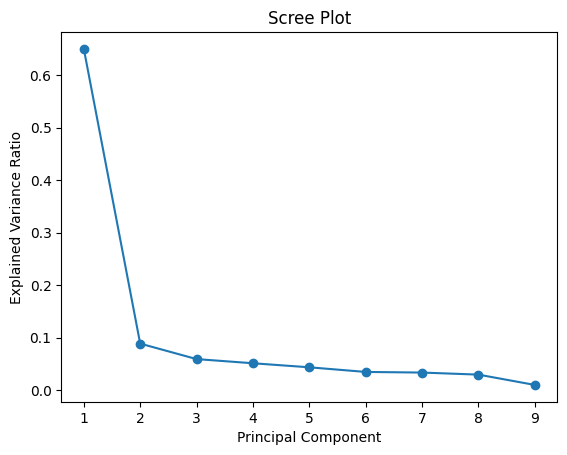

In [35]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

PCA with d = 4

In [36]:
pca_d = PCA(n_components=4)
X_train_pca_d = pca_d.fit_transform(X_train)
X_test_pca_d = pca_d.transform(X_test)

In [37]:
print("explained variance is ", pca_d.explained_variance_ratio_)
print('Sum of variance is ', np.sum(pca_d.explained_variance_ratio_))

explained variance is  [0.65013219 0.08863149 0.05911171 0.0511707 ]
Sum of variance is  0.8490460925748246


In [ ]:
rf_pca = RandomForestClassifier(random_state=20)
rf_pca.fit(X_train_pca_d, y_train)
y_pred_pca = rf_pca.predict(X_test_pca_d)

conf_matrix2 = confusion_matrix(y_test, y_pred_pca)
acc2 = accuracy_score(y_test, y_pred_pca)




[[134   4]
 [  0  72]]
0.9809523809523809


In [40]:
print(conf_matrix)
print(conf_matrix1) 
print(conf_matrix2)
print(acc, acc1, acc2)

[[134   1]
 [  4  71]]
[[134   3]
 [  4  69]]
[[134   4]
 [  0  72]]
0.9761904761904762 0.9666666666666667 0.9809523809523809
